In [2]:
#importing the necessary libraries.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [3]:
# Data-loading
df = pd.read_csv("data/mushrooms.csv")

In [4]:
# Label-Encoding
enc = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = enc.fit_transform(df[col])

In [5]:
X = df.drop(['class'], axis=1)  
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [6]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9660180371352783


c:\mushroom_classification1\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\mushroom_classification1\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\mushroom_classification1\myenv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\mushroom_classification1\myenv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\m

In [7]:
classifier = DecisionTreeClassifier(criterion="gini" , max_depth=8,max_features="log2",min_samples_leaf=1,min_samples_split=5)

In [8]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_features='log2', min_samples_split=5)

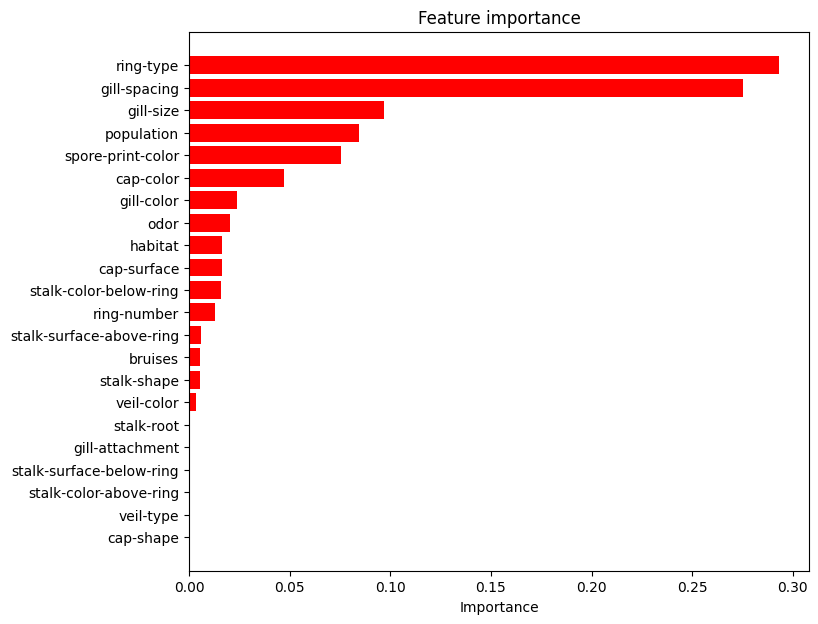

In [9]:
# Feature Importance :
features_list = X.columns.values
feature_importance = classifier.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

[Text(0.4642857142857143, 0.9444444444444444, 'x[18] <= 3.5\ngini = 0.499\nsamples = 7311\nvalue = [3775, 3536]'),
 Text(0.26785714285714285, 0.8333333333333334, 'x[6] <= 0.5\ngini = 0.379\nsamples = 3756\nvalue = [955.0, 2801.0]'),
 Text(0.3660714285714286, 0.8888888888888888, 'True  '),
 Text(0.17857142857142858, 0.7222222222222222, 'x[20] <= 2.5\ngini = 0.137\nsamples = 3016\nvalue = [223.0, 2793.0]'),
 Text(0.10714285714285714, 0.6111111111111112, 'x[8] <= 10.5\ngini = 0.268\nsamples = 213\nvalue = [179, 34]'),
 Text(0.07142857142857142, 0.5, 'x[4] <= 4.5\ngini = 0.158\nsamples = 196\nvalue = [179, 17]'),
 Text(0.03571428571428571, 0.3888888888888889, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.10714285714285714, 0.3888888888888889, 'gini = 0.0\nsamples = 179\nvalue = [179, 0]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.25, 0.6111111111111112, 'x[1] <= 2.5\ngini = 0.031\nsamples = 2803\nvalue = [44, 2759]'),
 Text(0.21428571428

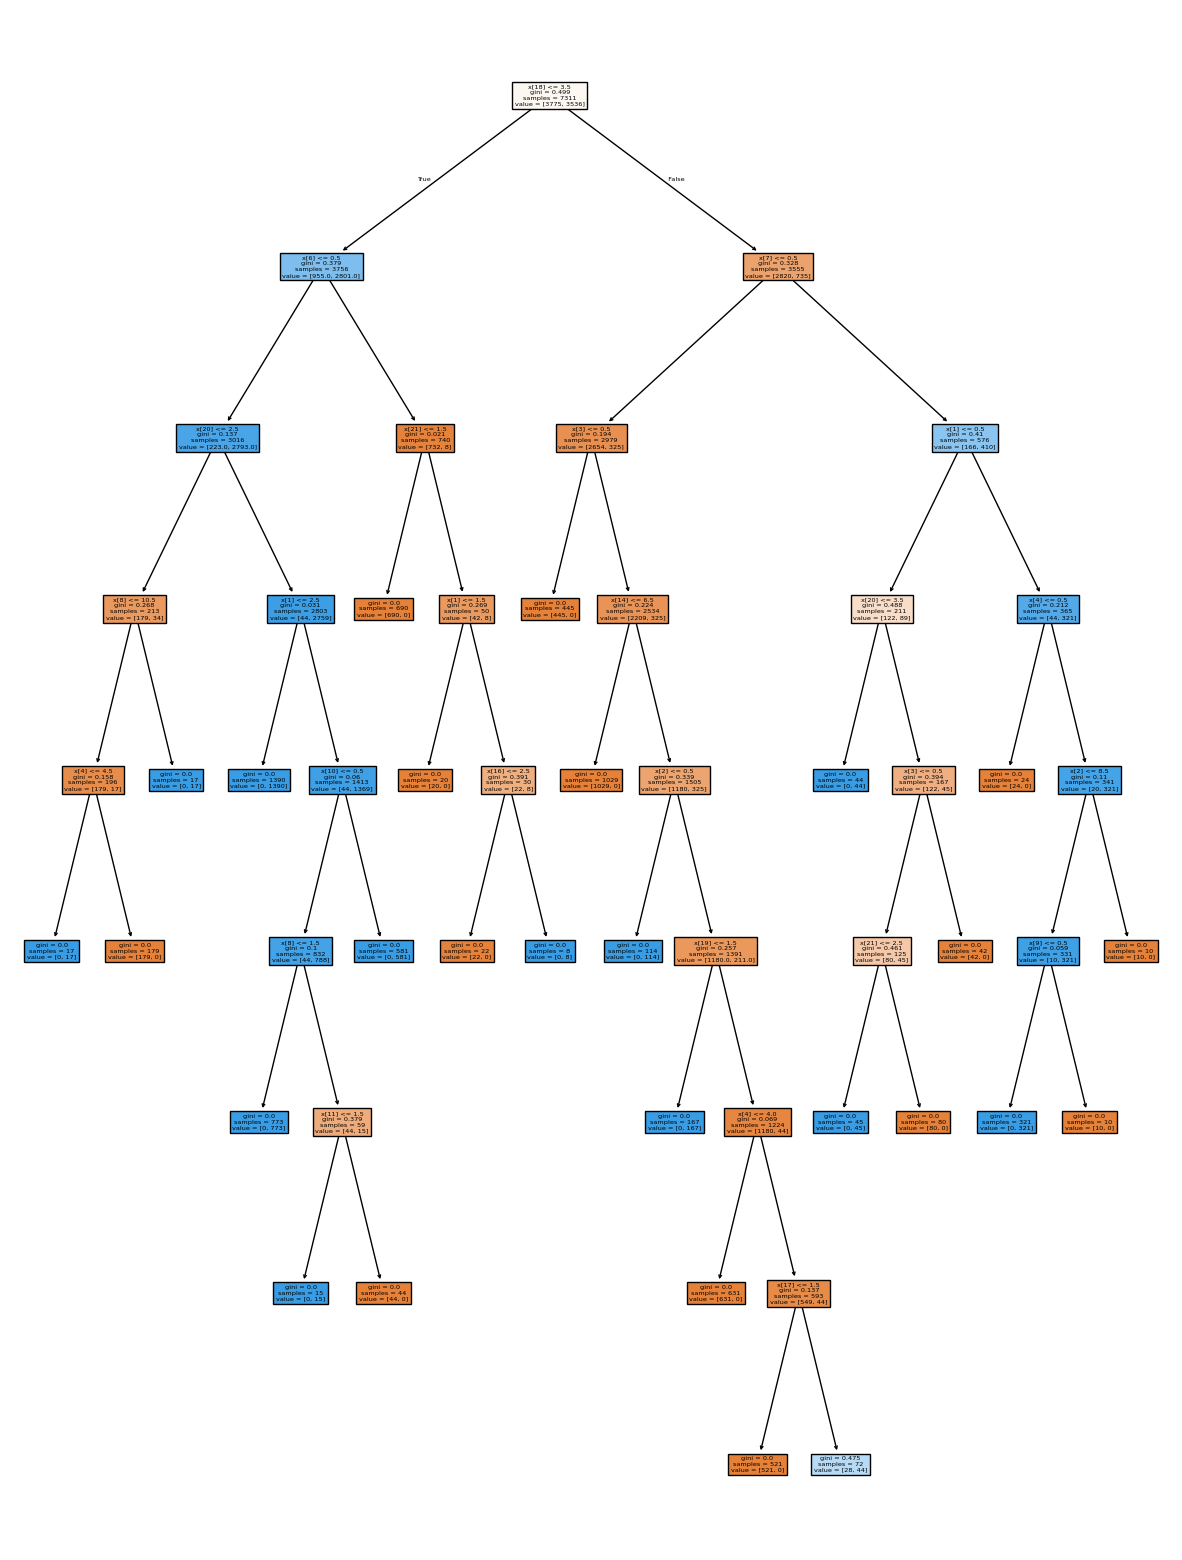

In [10]:
# Creating your Decision Tree
plt.figure(figsize=(15,20))
tree.plot_tree(classifier , filled = True)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      0.99       380

    accuracy                           1.00       813
   macro avg       0.99      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [13]:
print("Test Accuracy: {}%".format(round(classifier.score(X_test, y_test)*100, 2)))

Test Accuracy: 99.51%


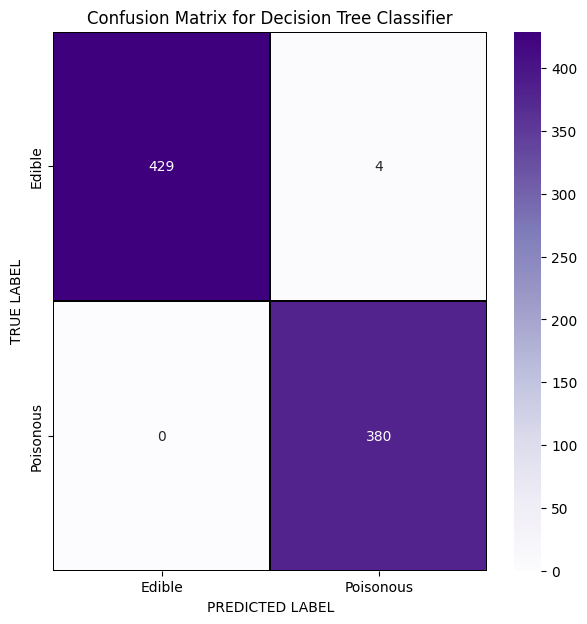

In [14]:
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [15]:
# Applying the Logistic Regression to it : Binary Classification ( Edible or Not? )

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 94.96%


In [16]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



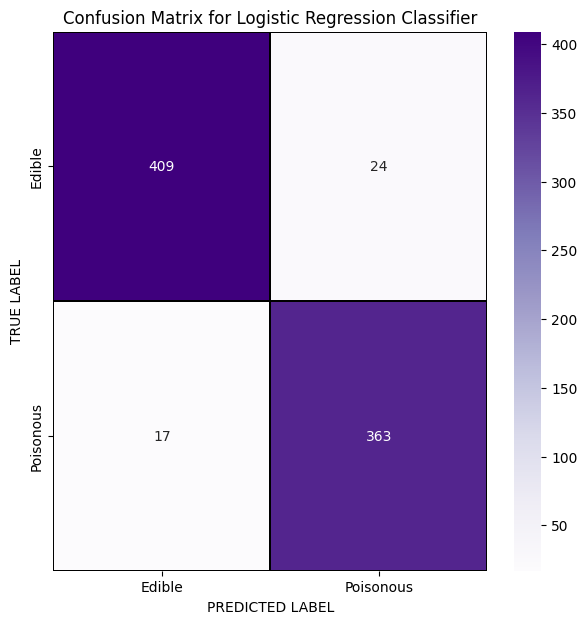

In [17]:
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [18]:
# DT CLASSIFICATION

preds = classifier.predict(X_test)

print(preds[:36])
print(y_test[:36].values)

# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


In [19]:
# LR CLASSIFICATION

preds = lr.predict(X_test)

print(preds[:36])
print(y_test[:36].values)

# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


In [20]:
#Serialization using the Pickle Module:
pickle.dump(lr,open('model.pkl','wb'))

In [21]:
pickled_model = pickle.load(open('model.pkl','rb'))
#batch-output
pickled_model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,